# Random Forest Classifier

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions Hard Voting
y_pred = rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')



Random Forest Accuracy: 1.00


# Feature Importance with Random Forest

In [ ]:
# Get feature importance from the trained model
importances = rf.feature_importances_

# Print feature importance
for i, feature in enumerate(data.feature_names):
    print(f'{feature}: {importances[i]:.4f}')

sepal length (cm): 0.1041
sepal width (cm): 0.0446
petal length (cm): 0.4173
petal width (cm): 0.4340


Permutation Feature Importance:
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.1311
petal width (cm): 0.1567


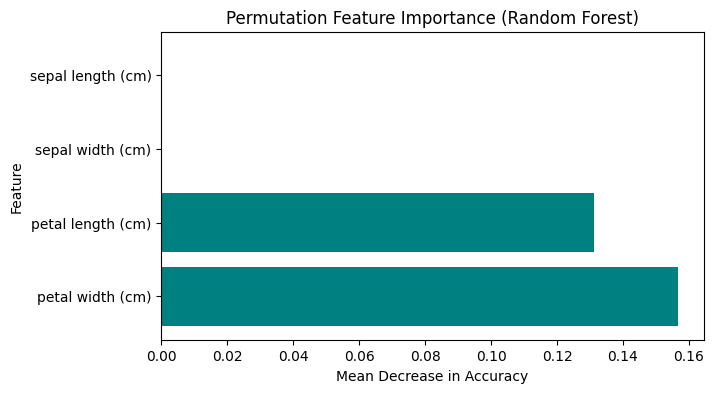

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# حساب Permutation Importance
perm_result = permutation_importance(rf, X_test, y_test, n_repeats=20, random_state=42)

# استخراج القيم
perm_importances = perm_result.importances_mean
features = data.feature_names

# عرض النتائج بشكل نصي
print("Permutation Feature Importance:")
for feature, importance in zip(features, perm_importances):
    print(f"{feature}: {importance:.4f}")

# رسم النتائج بشكل بصري
plt.figure(figsize=(7,4))
plt.barh(features, perm_importances, color='teal')
plt.title("Permutation Feature Importance (Random Forest)")
plt.xlabel("Mean Decrease in Accuracy")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


# OOB Error with Random Forest

In [ ]:
# Enable OOB error calculation
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train, y_train)

# OOB error
oob_error = 1 - rf_oob.oob_score_
print(f'OOB Error: {oob_error:.4f}')

OOB Error: 0.0571


# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize AdaBoost with a weak decision tree as base estimator
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                         n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada.predict(X_test)

# Evaluate accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f'AdaBoost Accuracy: {accuracy_ada:.2f}')

AdaBoost Accuracy: 1.00


# XGBoost

In [ ]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load California Housing dataset
data_california = fetch_california_housing()
X = data_california.data
y = data_california.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert data into DMatrix (XGBoost format)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression task
    'max_depth': 4,
    'eta': 0.1,
    'eval_metric': 'rmse'
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred_xgb = model.predict(dtest)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'XGBoost RMSE: {rmse:.2f}')

XGBoost RMSE: 0.50
